In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#.csvデータの読み込み
df = pd.read_csv("./../data/ks-projects-201801.csv")

In [3]:
data = df
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# "ID"列をDataFrameのインデックスにする
data.set_index(keys="ID", inplace=True)
# "name"列を削除
data.drop(columns=["name"], inplace=True)

In [5]:
# DataFrameの行数、列数
display(data.shape)
# 列名
display(data.columns)

(378661, 13)

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 13 columns):
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 40.4+ MB


In [7]:
#欠損値の数を数える
data.isnull().sum()

category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
#欠損値のある行を削除
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [10]:
#目的変数の内訳
data["state"].value_counts(normalize=True)

failed        0.527162
successful    0.357065
canceled      0.103389
live          0.007464
suspended     0.004919
Name: state, dtype: float64

In [11]:
#　"canceled", "live", "suspend"のデータ数が少ないので, 成功or失敗を識別するモデルを作成する
# "canceled", "live", "suspend"行の削除
data = data[(data.state == "failed") | (data.state == "successful")]

In [12]:
data["state"].value_counts(normalize=True)

failed        0.596184
successful    0.403816
Name: state, dtype: float64

In [13]:
# "pledged", "usd pledged", "usd_pledged_real"は、事前に知ることができないデータであり学習に使えないので削除
data.drop(columns=["pledged", "usd pledged", "usd_pledged_real"], inplace=True)

/Users/imlab/anaconda3/envs/skillupAI/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


state       country
failed      US         0.769485
            GB         0.087985
            CA         0.041677
            AU         0.023308
            DE         0.012646
            IT         0.009767
            NL         0.009078
            FR         0.008157
            ES         0.006988
            MX         0.005136
            SE         0.005060
            NZ         0.004180
            DK         0.002864
            IE         0.002409
            CH         0.002353
            NO         0.002125
            AT         0.001913
            BE         0.001877
            SG         0.001397
            HK         0.001321
            LU         0.000192
            JP         0.000081
successful  US         0.816572
            GB         0.090152
            CA         0.030885
            AU         0.015017
            DE         0.007000
            FR         0.006784
            NL         0.004610
            SE         0.003803
            ES      

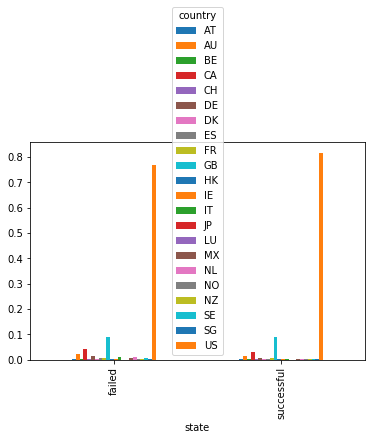

In [14]:
# 成功, 失敗別の国の内訳の可視化
ret = data.groupby("state")["country"].value_counts(normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

In [15]:
#"country"列の削除
data.drop(columns=["country"], inplace=True)

In [16]:
data.head()

,category,main_category,currency,deadline,goal,launched,state,backers,usd_goal_real
ID,,,,,,,,,
1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,1533.95
1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,30000.00
1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,45000.00
1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,5000.00
1000014025,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,224,50000.00


state       currency
failed      USD         0.769485
            GBP         0.087985
            EUR         0.053028
            CAD         0.041677
            AUD         0.023308
            MXN         0.005136
            SEK         0.005060
            NZD         0.004180
            DKK         0.002864
            CHF         0.002353
            NOK         0.002125
            SGD         0.001397
            HKD         0.001321
            JPY         0.000081
successful  USD         0.816572
            GBP         0.090152
            CAD         0.030885
            EUR         0.028973
            AUD         0.015017
            SEK         0.003803
            NZD         0.003347
            MXN         0.002959
            DKK         0.002690
            HKD         0.001614
            CHF         0.001397
            SGD         0.001330
            NOK         0.001210
            JPY         0.000052
Name: currency, dtype: float64

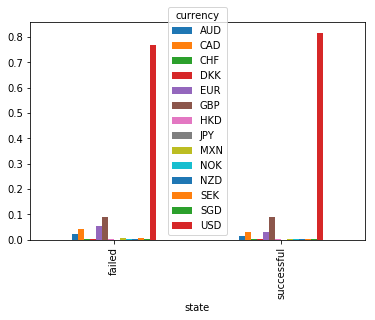

In [17]:
#成功, 失敗別の通貨単位の内訳の可視化
ret = data.groupby("state")["currency"].value_counts(normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

state       category         
failed      Product Design       0.054237
            Documentary          0.043514
            Food                 0.036025
            Video Games          0.035129
            Music                0.031096
            Fiction              0.029730
            Film & Video         0.028045
            Fashion              0.027027
            Nonfiction           0.026233
            Apps                 0.024841
            Apparel              0.024042
            Shorts               0.023890
            Technology           0.022296
            Art                  0.020753
            Tabletop Games       0.019624
            Web                  0.019563
            Children's Books     0.019482
            Webseries            0.017458
            Publishing           0.017104
            Photography          0.017053
            Crafts               0.015131
            Hip-Hop              0.014457
            Rock                 0.013896
    

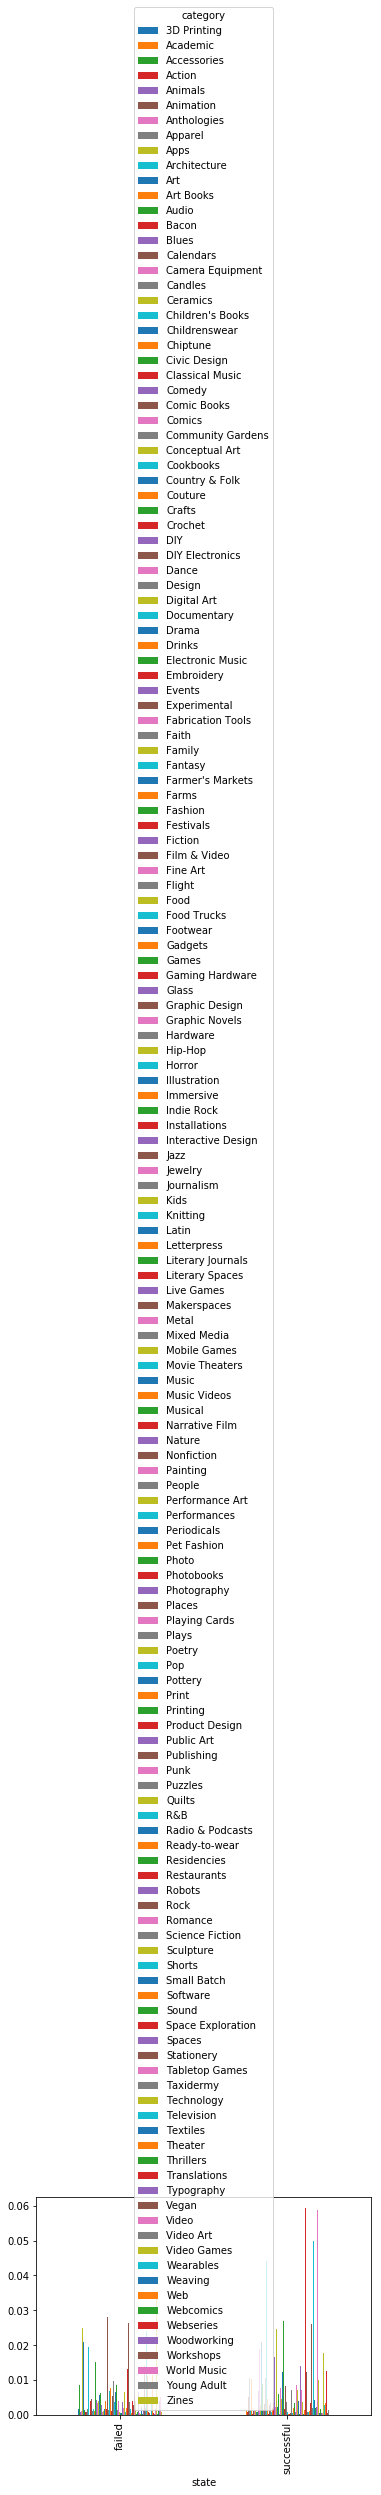

In [18]:
#成功, 失敗別のカテゴリの内訳の可視化
ret = data.groupby("state")["category"].value_counts(normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

state       main_category
failed      Film & Video     0.166446
            Publishing       0.116960
            Music            0.109790
            Technology       0.104309
            Games            0.080981
            Food             0.080809
            Design           0.074964
            Fashion          0.071761
            Art              0.071508
            Photography      0.032305
            Crafts           0.028859
            Comics           0.020424
            Theater          0.018764
            Journalism       0.015869
            Dance            0.006250
successful  Music            0.180088
            Film & Video     0.176405
            Games            0.093522
            Publishing       0.091893
            Art              0.085991
            Design           0.078812
            Theater          0.048815
            Technology       0.048061
            Food             0.045461
            Comics           0.043646
            Fashion     

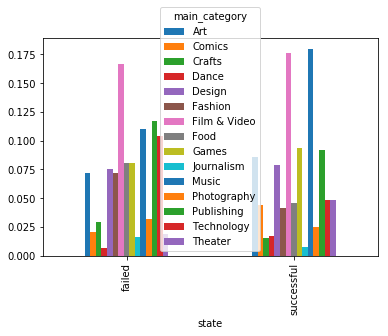

In [19]:
#成功, 失敗別のメインカテゴリの内訳の可視化
ret = data.groupby("state")["main_category"].value_counts(normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

In [20]:
# "main_category", "currency"列の削除
data.drop(columns=["main_category", "currency"],  inplace=True)

In [21]:
data.head()

,category,deadline,goal,launched,state,backers,usd_goal_real
ID,,,,,,,
1000002330,Poetry,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,1533.95
1000003930,Narrative Film,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,30000.00
1000004038,Narrative Film,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,45000.00
1000007540,Music,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,5000.00
1000014025,Restaurants,2016-04-01,50000.0,2016-02-26 13:38:27,successful,224,50000.00


In [22]:
data[['deadline','launched']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331465 entries, 1000002330 to 999988282
Data columns (total 2 columns):
deadline    331465 non-null object
launched    331465 non-null object
dtypes: object(2)
memory usage: 7.6+ MB


In [23]:
# "deadline"と"launched"列の型をdatetime64に変換
data = data.astype({'deadline':'datetime64',
                'launched':'datetime64'
               }
              )
data[['deadline','launched']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331465 entries, 1000002330 to 999988282
Data columns (total 2 columns):
deadline    331465 non-null datetime64[ns]
launched    331465 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.6 MB


In [24]:
# 期限の計算
display(data[['deadline','launched']].head())
time_to_deadline = data["deadline"] - data["launched"]
print(time_to_deadline)

,deadline,launched
ID,,
1000002330,2015-10-09,2015-08-11 12:12:28
1000003930,2017-11-01,2017-09-02 04:43:57
1000004038,2013-02-26,2013-01-12 00:20:50
1000007540,2012-04-16,2012-03-17 03:24:11
1000014025,2016-04-01,2016-02-26 13:38:27


ID
1000002330   58 days 11:47:32
1000003930   59 days 19:16:03
1000004038   44 days 23:39:10
1000007540   29 days 20:35:49
1000014025   34 days 10:21:33
1000023410   19 days 05:29:16
1000030581   44 days 03:54:48
100004721    29 days 05:40:23
100005484    29 days 17:17:02
1000055792   29 days 06:48:10
1000056157   44 days 00:58:48
1000057089   27 days 04:15:42
1000064368   29 days 21:49:07
1000064918   29 days 01:32:08
1000068480   29 days 02:39:06
1000070642   14 days 09:48:28
1000071625   29 days 06:35:28
1000072011   34 days 16:53:49
1000081649   29 days 22:39:40
1000082254   29 days 13:49:22
1000087442   29 days 04:42:27
1000091520   19 days 06:44:10
1000102741   29 days 00:43:10
1000103948   29 days 03:50:54
1000104688   29 days 05:58:00
1000104953   29 days 07:00:31
100011318    29 days 06:48:27
1000115172   29 days 05:53:28
1000117861   30 days 10:45:34
1000120151   29 days 20:50:17
                   ...       
999801508    29 days 22:41:06
999811847    14 days 01:53:16
9998147

In [25]:
# 新しい特徴量"days_to_deadline"の追加
data["days_to_deadline"] = time_to_deadline.dt.days
data.head()

,category,deadline,goal,launched,state,backers,usd_goal_real,days_to_deadline
ID,,,,,,,,
1000002330,Poetry,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,1533.95,58
1000003930,Narrative Film,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,30000.00,59
1000004038,Narrative Film,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,45000.00,44
1000007540,Music,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,5000.00,29
1000014025,Restaurants,2016-04-01,50000.0,2016-02-26 13:38:27,successful,224,50000.00,34


In [26]:
# "deadline", "launched"列の削除
data.drop(columns=["deadline", "launched"], inplace=True)

state       days_to_deadline
failed      (20.0, 40.0]        0.683838
            (40.0, 60.0]        0.218411
            (0.999, 20.0]       0.084554
            (80.0, 100.0]       0.008638
            (60.0, 80.0]        0.004271
successful  (20.0, 40.0]        0.710566
            (40.0, 60.0]        0.140133
            (0.999, 20.0]       0.137197
            (80.0, 100.0]       0.006418
            (60.0, 80.0]        0.005424
Name: days_to_deadline, dtype: float64

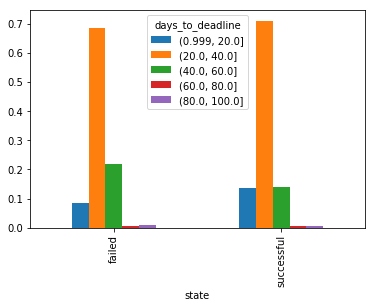

In [27]:
# 成功, 失敗別の期限の内訳の可視化
ret = data.groupby("state")["days_to_deadline"].value_counts(bins=[1,20,40,60,80,100], normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

In [28]:
# "days_to_deadline"の削除
data.drop(columns=["days_to_deadline"], inplace=True)
data.head()

,category,goal,state,backers,usd_goal_real
ID,,,,,
1000002330,Poetry,1000.0,failed,0,1533.95
1000003930,Narrative Film,30000.0,failed,15,30000.00
1000004038,Narrative Film,45000.0,failed,3,45000.00
1000007540,Music,5000.0,failed,1,5000.00
1000014025,Restaurants,50000.0,successful,224,50000.00


In [29]:
# "usd_goal_real"列を学習に使うので"goal"列は削除
data.drop(columns=["goal"], inplace=True)
data.head()

,category,state,backers,usd_goal_real
ID,,,,
1000002330,Poetry,failed,0,1533.95
1000003930,Narrative Film,failed,15,30000.00
1000004038,Narrative Film,failed,3,45000.00
1000007540,Music,failed,1,5000.00
1000014025,Restaurants,successful,224,50000.00


In [30]:
data["backers"].describe()

count    331465.000000
mean        116.455315
std         965.728598
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

state       backers         
failed      (-0.001, 2.0]       0.444837
            (2.0, 15.0]         0.343731
            (15.0, 63.0]        0.158379
            (63.0, 220000.0]    0.053053
successful  (63.0, 220000.0]    0.537971
            (15.0, 63.0]        0.372571
            (2.0, 15.0]         0.084333
            (-0.001, 2.0]       0.005125
Name: backers, dtype: float64

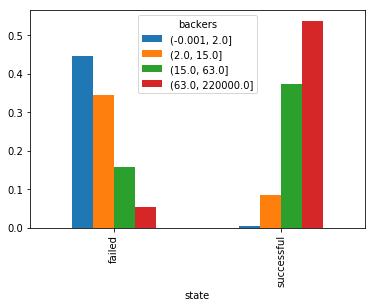

In [31]:
# 成功, 失敗別の支援者の内訳の可視化
ret = data.groupby("state")["backers"].value_counts(bins=[0,2,15,63,220000], normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

In [32]:
data["usd_goal_real"].describe()

count    3.314650e+05
mean     4.152320e+04
std      1.109274e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

state       usd_goal_real         
failed      (15000.0, 166361400.0]    0.305960
            (5000.0, 15000.0]         0.260877
            (2000.0, 5000.0]          0.218077
            (-0.001, 2000.0]          0.215086
successful  (-0.001, 2000.0]          0.350644
            (2000.0, 5000.0]          0.263293
            (5000.0, 15000.0]         0.244630
            (15000.0, 166361400.0]    0.141433
Name: usd_goal_real, dtype: float64

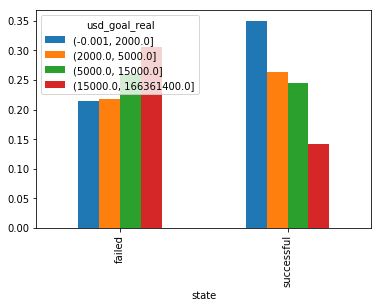

In [33]:
# 成功, 失敗の目標金額（USドル）の内訳の可視化
ret = data.groupby("state")["usd_goal_real"].value_counts(bins=[0, 2.000000e+03, 5.000000e+03, 1.500000e+04, 1.663614e+08], normalize=True)
display(ret)
ret.unstack().plot.bar()
plt.show()

In [34]:
data.head()

,category,state,backers,usd_goal_real
ID,,,,
1000002330,Poetry,failed,0,1533.95
1000003930,Narrative Film,failed,15,30000.00
1000004038,Narrative Film,failed,3,45000.00
1000007540,Music,failed,1,5000.00
1000014025,Restaurants,successful,224,50000.00


In [35]:
data["state"].value_counts()

failed        197614
successful    133851
Name: state, dtype: int64

In [36]:
#量的変数をダミー変数化
data = pd.get_dummies(data)

In [37]:
display(data.columns)
display(data.shape)

Index(['backers', 'usd_goal_real', 'category_3D Printing', 'category_Academic',
       'category_Accessories', 'category_Action', 'category_Animals',
       'category_Animation', 'category_Anthologies', 'category_Apparel',
       ...
       'category_Web', 'category_Webcomics', 'category_Webseries',
       'category_Woodworking', 'category_Workshops', 'category_World Music',
       'category_Young Adult', 'category_Zines', 'state_failed',
       'state_successful'],
      dtype='object', length=163)

(331465, 163)

In [38]:
#説明変数と目的変数に分ける
X = data.drop(columns=["state_failed", "state_successful"], inplace=False).values
y = data[["state_successful"]].values

In [39]:
#ホールドアウト法を行う
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# モデルの作成（ランダムフォレスト）
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_estimators=100, max_depth=30, criterion="entropy",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)

/Users/imlab/anaconda3/envs/skillupAI/lib/python3.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [43]:
#モデルの評価
from sklearn.metrics import confusion_matrix

In [44]:
#訓練データの正答率, 再現率、適合率
y_est = clf.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_est).ravel()
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

Accuracy  = 94.074%
Recall    = 94.129%
Precision = 91.437%


In [45]:
#汎化性能
y_est = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

Accuracy  = 92.855%
Recall    = 92.763%
Precision = 89.902%


In [46]:
# モデルの作成　（ロジスティック回帰）
from sklearn.linear_model import SGDClassifier

In [47]:
model = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=0)

model.fit(X_train, y_train)

/Users/imlab/anaconda3/envs/skillupAI/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/imlab/anaconda3/envs/skillupAI/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
#モデルの評価
#訓練データの正答率, 再現率、適合率
y_est = model.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_est).ravel()
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

Accuracy  = 90.231%
Recall    = 95.385%
Precision = 82.959%


In [49]:
#汎化性能
y_est = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

Accuracy  = 90.331%
Recall    = 95.584%
Precision = 83.074%
